## Agilent_exome-LAFE_r1--alignmnet

<pre>

</pre>


### step_2

previous ipython: exome_LAFE-2017-07-20--preprocess_fastq.ipynb

In [53]:
import os
import sys
import pandas as pd
import pickle
import pprint
from datetime import datetime

pp = pprint.PrettyPrinter(indent=4)
pp = pp.pprint

print("Pandas version: {}".format(pd.__version__))

# get data and current dir
cwd = os.getcwd()
print ( 'current dir is: "' + cwd + '"')


date_time = datetime.now().strftime('%Y-%m-%d_%H_%M_%S')
date = datetime.now().strftime('%Y-%m-%d')
print("date: "+ date)
print("date_time = " + date_time)

Pandas version: 0.20.2
current dir is: "/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19"
date: 2017-07-21
date_time = 2017-07-21_18_16_27


In [41]:
def even_items(list):
    return list[1::2]

def odd_items(list):
    return list[0::2]

In [3]:
%%bash
ls -lh

total 168K
-rw-rw-r-- 1 pmg bioinfo  733 jul 21 15:26 Agilent_exome-LAFE_r1--alignmnet.ipynb
-rw-rw-r-- 1 pmg bioinfo 126K jul 21 15:24 exome_LAFE-2017-07-20--preprocess_fastq.ipynb
-rw-rw-r-- 1 pmg bioinfo  11K jul 20 13:31 lafe_fastq.fof
-rw-rw-r-- 1 pmg bioinfo  23K jul 21 15:23 test_self.p


In [76]:
self = pickle.load(open('test_self.p', 'rb'))
self


{'config': {'QC_path': '',
  'analysis_folder_path': '/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19',
  'bams_path': '',
  'fastq_fof': 'lafe_fastq.fof',
  'fastqs_path': '/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/fastq',
  'project': 'LaFe-exome_agilent',
  'vcfs_path': ''},
 'data': {'align_cmd_by_sample': {},
  'fastq_df':     assay    sample                        fastq_file  \
  53   E176   RPN-284   RPN-284_S5_L001_R1_001.fastq.gz   
  51   E176   RPN-284   RPN-284_S5_L001_R2_001.fastq.gz   
  50   E176   RPN-284   RPN-284_S5_L002_R1_001.fastq.gz   
  54   E176   RPN-284   RPN-284_S5_L002_R2_001.fastq.gz   
  48   E176   RPN-284   RPN-284_S5_L003_R1_001.fastq.gz   
  49   E176   RPN-284   RPN-284_S5_L003_R2_001.fastq.gz   
  55   E176   RPN-284   RPN-284_S5_L004_R1_001.fastq.gz   
  52   E176   RPN-284   RPN-284_S5_L004_R2_001.fastq.gz   
  33   E176   RPN-293   RPN-293_S7_L001_R1_001.fastq.gz

    bwa mem -t 8 /DATA/references_and_genomic_db_devel/genodb/hs37d5_1kg/hs37d5.fa.gz \
        <( zcat ../../data/T-2/31299-40898351/31299_S6_L001_R1_001.fastq.gz \
        ../../data/T-2/31299-40898351/31299_S6_L002_R1_001.fastq.gz \
        ../../data/T-2/31299-40898351/31299_S6_L003_R1_001.fastq.gz \
        ../../data/T-2/31299-40898351/31299_S6_L004_R1_001.fastq.gz ) \
        <( zcat ../../data/T-2/31299-40898351/31299_S6_L001_R2_001.fastq.gz \
        ../../data/T-2/31299-40898351/31299_S6_L002_R2_001.fastq.gz \
        ../../data/T-2/31299-40898351/31299_S6_L003_R2_001.fastq.gz \
        ../../data/T-2/31299-40898351/31299_S6_L004_R2_001.fastq.gz ) \
    | /home/pmg/software/.linuxbrew/bin/samtools sort -T /tmp/T-1__31290-31290_S10_L001_R1_001.fastq.gzaln.sorted -O bam -o ./31290-40885542.bam ; rm -f /tmp/T-1__31290-*aln.sorted;/home/pmg/software/.linuxbrew/bin/samtools index .
/31290-40885542.bam



In [77]:
ll=[1,2,3,4,5,6,7,8,9,10]

ll[1::2]

[2, 4, 6, 8, 10]

In [78]:
## test R1 and R2 simetric arrasy construction
debug =0

self['data']['align_cmd_by_sample'] = {}

def write_bwa_commands(self):
    """
    """
    project = self['config']['project']
    ref_b37 = self['data']['ref_b37']
    bwa_command_tt = 'bwa mem -t 8 {0} '.format(ref_b37)
    
    fastq_df = self['data']['fastq_df']

    for idx,sample in enumerate(self['data']['sample_list']):
        idx=idx+1
        
        samtools_tmp_file = '/tmp/{0}--{1}-{2}.sorted'.format(date, project, sample)
        samtools_sort_tt = 'samtools sort -T ' + samtools_tmp_file + ' -O bam -o ./bams/{0}.sorted.bam'.format(sample)
        samtools_idx_tt = 'samtools index ./bams/{0}.sorted.bam'.format(sample)
        rm_samtools_tmp_tt = 'rm -f ' + samtools_tmp_file
    
        print("==" + sample + "==")
        fastq_list = list(fastq_df[fastq_df['sample'] == sample]['fastq_path'])
    
        R1_list = odd_items(fastq_list)
        R2_list = even_items(fastq_list)
        #pp(R1_list)
        #pp(R2_list)
    
        R1_str = "<( zcat {} )".format(' '.join(R1_list))
        #print(R1_str)

        R2_str = "<( zcat {} )".format(' '.join(R2_list))
        #print(R2_str)
    
        bwa_input_tt = ' '.join([R1_str, R2_str])
        samtools_tt = ' {};{};{}'.format(samtools_sort_tt, rm_samtools_tmp_tt, samtools_idx_tt)
    
        cmd = bwa_command_tt + bwa_input_tt + ' | ' + samtools_tt
        
        print(cmd)
        
        self['data']['align_cmd_by_sample'][sample] =  cmd
        
        # get fastq for sample
        if debug and idx >=2:
            break
            
write_bwa_commands(self)

==RPN-284==
bwa mem -t 8 /DATA/references_and_genomic_db_devel/genodb/hs37d5_1kg/hs37d5.fa.gz <( zcat ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L001_R1_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L002_R1_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L003_R1_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L004_R1_001.fastq.gz ) <( zcat ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L001_R2_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L002_R2_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L003_R2_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L004_R2_001.fastq.gz ) |  samtools sort -T /tmp/2017-07-21--LaFe-exome_agilent-RPN-284.sorted -O bam -o ./bams/RPN-284.sorted.bam;rm 

In [79]:
self['data']['align_cmd_by_sample']

{'RPN-1059': 'bwa mem -t 8 /DATA/references_and_genomic_db_devel/genodb/hs37d5_1kg/hs37d5.fa.gz <( zcat ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L001_R1_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L002_R1_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L003_R1_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L004_R1_001.fastq.gz ) <( zcat ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L001_R2_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L002_R2_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L003_R2_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L004_R2_001.fastq.gz ) |  samtools sort -T /tmp/2017-07-21--LaFe-exome_agilent-RPN-1059.sorted -O bam -o ./bams/RPN-1059.so

In [86]:
step3_cmd = "\n".join(self['data']['align_cmd_by_sample'].values())

self['workflow']['steps']['Step_3']['cmd'] = step3_cmd

# write sh
alignment_fh = open('bwa_samtools.sh', 'w')
alignment_fh.write(step3_cmd)

15225

In [87]:
%%bash
ls -lh

total 284K
-rw-rw-r-- 1 pmg bioinfo  91K jul 21 19:08 Agilent_exome-LAFE_r1--alignmnet.ipynb
drwxrwxr-x 2 pmg bioinfo 4,0K jul 21 18:31 annotated
drwxrwxr-x 2 pmg bioinfo 4,0K jul 21 18:30 bams
-rw-rw-r-- 1 pmg bioinfo  15K jul 21 19:09 bwa_samtools.sh
-rw-rw-r-- 1 pmg bioinfo 126K jul 21 19:04 exome_LAFE-2017-07-20--preprocess_fastq.ipynb
-rw-rw-r-- 1 pmg bioinfo  11K jul 21 18:06 lafe_fastq.fof
-rw-rw-r-- 1 pmg bioinfo    0 jul 21 18:06 README
-rw-rw-r-- 1 pmg bioinfo  23K jul 21 19:03 test_self.p
drwxrwxr-x 2 pmg bioinfo 4,0K jul 21 18:30 vcfs


In [88]:
%%bash
cat bwa_samtools.sh

bwa mem -t 8 /DATA/references_and_genomic_db_devel/genodb/hs37d5_1kg/hs37d5.fa.gz <( zcat ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L001_R1_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L002_R1_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L003_R1_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L004_R1_001.fastq.gz ) <( zcat ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L001_R2_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L002_R2_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L003_R2_001.fastq.gz ../../fastq/E176_LAFE/Exoma_E176_La_Fe-42696655/RPN-284-51470420/RPN-284_S5_L004_R2_001.fastq.gz ) |  samtools sort -T /tmp/2017-07-21--LaFe-exome_agilent-RPN-284.sorted -O bam -o ./bams/RPN-284.sorted.bam;rm -f /tmp/2017

In [85]:
self

{'config': {'QC_path': '',
  'analysis_folder_path': '/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19',
  'bams_path': '',
  'fastq_fof': 'lafe_fastq.fof',
  'fastqs_path': '/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/fastq',
  'project': 'LaFe-exome_agilent',
  'vcfs_path': ''},
 'data': {'align_cmd_by_sample': {'RPN-1059': 'bwa mem -t 8 /DATA/references_and_genomic_db_devel/genodb/hs37d5_1kg/hs37d5.fa.gz <( zcat ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L001_R1_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L002_R1_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L003_R1_001.fastq.gz ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L004_R1_001.fastq.gz ) <( zcat ../../fastq/E177_LAFE/Exoma_E177_LaFe-42766724/RPN-1059-51468477/RPN-1059_S2_L001_R2_001.fastq.g

## Pipeline

<pre>
README
========


pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19]
[devel|GRCh37|ens-75|python3.6venv1]$ time parallel --joblog bwa-samtools.log -j4 -k '{}' :::: bwa_samtools.sh
[..]
real    303m45.523s
user    5486m36.164s
sys     193m2.280s

pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$  time parallel --joblog ../log_parallel/flagstat_rmdup-bas.log -j7 "samtools flagstat {} > ./rmdup_bas/{/}.bas" :::: rmdup_bam.fof

real    2m48.475s
user    18m6.180s
sys     0m19.584s



pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ time parallel --joblog ../log_parallel/addRG.log  -j 24 "echo {};picard AddOrReplaceReadGroups I={}.sorted.bam O={}.sorted.rg.bam RGID={} RGLB=Agilent RGPU=0 RGPL=Illumina RGSM={}" :::: ../samples.txt
[..]
real    35m18.204s
user    442m29.448s
sys     5m29.524s

ls *sorted.rg.bam > rg_bam.fof


pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ time parallel --joblog ../log_parallel/rgbam-index -j10 -k 'samtools index {}' :::: rg_bam.fof
[..]
real    5m13.325s
user    30m20.284s
sys     0m43.696s


pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ time parallel --joblog ../log_parallel/rmdup.log -j14  "samtools rmdup {} rmdup_bam/{/.}.rmdup.bam" :::: rg_bam.fof
[...]
real    36m3.368s
user    409m21.376s
sys     2m27.848s


[devel|GRCh37|ens-75|python3.6venv1]$ ls rmdup_bam/RPN-*bam > rmdup_bam.fof
pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ time parallel --joblog ../log_parallel/rmdup.log -j14  "samtools rmdup {} rmdup_bam/{/.}.rmdup.ba[devel|GRCh37|ens-75|python3.6venv1]$ time parallel --joblog ../log_parallel/rmdup-index -j14  'samtools index {}' :::: rmdup_bam.fof

real    4m1.616s
user    28m45.276s
sys     0m51.548s

pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$  time parallel --joblog ../log_parallel/flagstat_rmdup-bas.log -j7 "samtools flagstat {} > ./rmdu
p_bas/{/}.bas" :::: rmdup_bam.fof

real    2m48.475s
user    18m6.180s
sys     0m19.584s


pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ grep mapped\ \( ori_bas/*bas
ori_bas/RPN-1059.sorted.bam.bas:166367089 + 0 mapped (99.46% : N/A)
ori_bas/RPN-1278.sorted.bam.bas:148267473 + 0 mapped (99.48% : N/A)
ori_bas/RPN-1612.sorted.bam.bas:140619179 + 0 mapped (99.46% : N/A)
ori_bas/RPN-1636.sorted.bam.bas:140986750 + 0 mapped (99.45% : N/A)
ori_bas/RPN-2017.sorted.bam.bas:160777568 + 0 mapped (99.43% : N/A)
ori_bas/RPN-2027.sorted.bam.bas:155583775 + 0 mapped (99.45% : N/A)
ori_bas/RPN-284.sorted.bam.bas:129014081 + 0 mapped (99.52% : N/A)
ori_bas/RPN-293.sorted.bam.bas:151468123 + 0 mapped (99.48% : N/A)
ori_bas/RPN-295.sorted.bam.bas:151139279 + 0 mapped (99.49% : N/A)
ori_bas/RPN-311.sorted.bam.bas:181830574 + 0 mapped (99.48% : N/A)
ori_bas/RPN-315.sorted.bam.bas:157077868 + 0 mapped (99.52% : N/A)
ori_bas/RPN-318.sorted.bam.bas:143460309 + 0 mapped (99.51% : N/A)
ori_bas/RPN-357.sorted.bam.bas:138721226 + 0 mapped (99.49% : N/A)
ori_bas/RPN-387.sorted.bam.bas:139927433 + 0 mapped (99.47% : N/A)
pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ grep mapped\ \( rmdup_bas/*bas
rmdup_bas/RPN-1059.sorted.rg.rmdup.bam.bas:118082969 + 0 mapped (99.24% : N/A)
rmdup_bas/RPN-1278.sorted.rg.rmdup.bam.bas:112716628 + 0 mapped (99.32% : N/A)
rmdup_bas/RPN-1612.sorted.rg.rmdup.bam.bas:102308741 + 0 mapped (99.25% : N/A)
rmdup_bas/RPN-1636.sorted.rg.rmdup.bam.bas:105821281 + 0 mapped (99.27% : N/A)
rmdup_bas/RPN-2017.sorted.rg.rmdup.bam.bas:118065916 + 0 mapped (99.23% : N/A)
rmdup_bas/RPN-2027.sorted.rg.rmdup.bam.bas:117263547 + 0 mapped (99.27% : N/A)
rmdup_bas/RPN-284.sorted.rg.rmdup.bam.bas:98600924 + 0 mapped (99.37% : N/A)
rmdup_bas/RPN-293.sorted.rg.rmdup.bam.bas:114284710 + 0 mapped (99.31% : N/A)
rmdup_bas/RPN-295.sorted.rg.rmdup.bam.bas:112618626 + 0 mapped (99.32% : N/A)
rmdup_bas/RPN-311.sorted.rg.rmdup.bam.bas:129497706 + 0 mapped (99.27% : N/A)
rmdup_bas/RPN-315.sorted.rg.rmdup.bam.bas:113331028 + 0 mapped (99.33% : N/A)
rmdup_bas/RPN-318.sorted.rg.rmdup.bam.bas:108559294 + 0 mapped (99.36% : N/A)
rmdup_bas/RPN-357.sorted.rg.rmdup.bam.bas:107685849 + 0 mapped (99.34% : N/A)
rmdup_bas/RPN-387.sorted.rg.rmdup.bam.bas:108328687 + 0 mapped (99.32% : N/A)
pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ grep mapped\ \( ori_bas/*bas > bas.df
pmg@SRVBIOL01:[/DATA/workspace/projects/0040_exomes_projects--production/0040.4-LaFE/analysis/0040.4-analysis-2017-07-19/bams]
[devel|GRCh37|ens-75|python3.6venv1]$ grep mapped\ \( rmdup_bas/*bas >>bas.df

## edited by hand the bass file
$ cat bams/bas.df
ori     RPN-1059        166367089       99.46
ori     RPN-1278        148267473       99.48
ori     RPN-1612        140619179       99.46
ori     RPN-1636        140986750       99.45
ori     RPN-2017        160777568       99.43
ori     RPN-2027        155583775       99.45
ori     RPN-284 129014081       99.52
ori     RPN-293 151468123       99.48
ori     RPN-295 151139279       99.49
ori     RPN-311 181830574       99.48
ori     RPN-315 157077868       99.52
ori     RPN-318 143460309       99.51
ori     RPN-357 138721226       99.49
ori     RPN-387 139927433       99.47
rmdup   RPN-1059        118082969       99.24
rmdup   RPN-1278        112716628       99.32
rmdup   RPN-1612        102308741       99.25
rmdup   RPN-1636        105821281       99.27
rmdup   RPN-2017        118065916       99.23
rmdup   RPN-2027        117263547       99.27
rmdup   RPN-284 98600924        99.37
rmdup   RPN-293 114284710       99.31
rmdup   RPN-295 112618626       99.32
rmdup   RPN-311 129497706       99.27
rmdup   RPN-315 113331028       99.33
rmdup   RPN-318 108559294       99.36
rmdup   RPN-357 107685849       99.34
rmdup   RPN-387 108328687       99.32

</pre>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
bas_df = pd.read_csv("../0040.4-analysis-2017-07-19/bams/bas.df", sep="\t")
bas_df

,group,sample,mapped_reads,percent_map
0,ori,RPN-1059,166367089,99.46
1,ori,RPN-1278,148267473,99.48
2,ori,RPN-1612,140619179,99.46
3,ori,RPN-1636,140986750,99.45
4,ori,RPN-2017,160777568,99.43
5,ori,RPN-2027,155583775,99.45
6,ori,RPN-284,129014081,99.52
7,ori,RPN-293,151468123,99.48
8,ori,RPN-295,151139279,99.49
9,ori,RPN-311,181830574,99.48


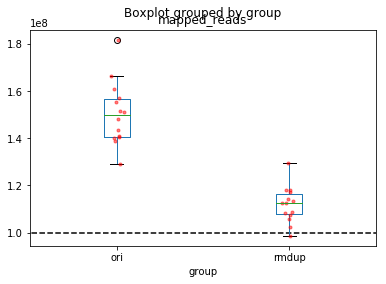

In [18]:
bas_df.boxplot(by="group", grid=False, column="mapped_reads")
for idx,i in enumerate(["ori", "rmdup"]):
    y = bas_df.mapped_reads[bas_df.group==i].dropna()
    # add some jitter
    x = np.random.normal(idx+1, 0.02, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.5)
    
plt.hlines(100e6,0,4,linestyle="--")

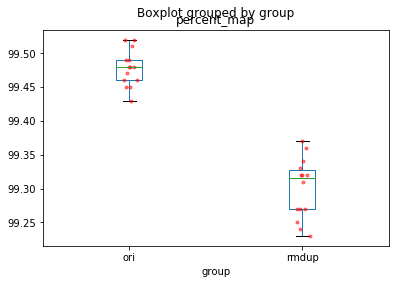

In [22]:
bas_df.boxplot(by="group", grid=False, column="percent_map")
for idx,i in enumerate(["ori", "rmdup"]):
    y = bas_df.percent_map[bas_df.group==i].dropna()
    # add some jitter
    x = np.random.normal(idx+1, 0.02, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.5)
    
#plt.hlines(98,0,4,linestyle="--")